In [1]:
import keras
from keras import layers
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.metrics._classification import classification_report

2025-11-07 19:27:35.377262: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762540055.394284   62620 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762540055.399212   62620 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762540055.412683   62620 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762540055.412723   62620 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762540055.412726   62620 computation_placer.cc:177] computation placer alr

# Tell the time network on smaller Dataset
## Starting with regression approach

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [3]:
X = np.load('A1_data_75/images.npy')
X = X/255
y = np.load('A1_data_75/labels.npy')

## Classification

In [4]:
y_30_min_bins = np.array([int(round((i *60 +j)/30,0)) for i,j in y])
y_20_min_bins = np.array([int(round((i *60 +j)/20,0)) for i,j in y])
y_10_min_bins = np.array([int(round((i *60 +j)/10,0)) for i,j in y])
y_1_min_bins = np.array([int((i *60 +j)) for i,j in y])

n_epochs = 50

## 30 Minute Bins

In [5]:
y_clas = y_30_min_bins
X_clas_train, X_clas_test, y_clas_train, y_clas_30_test = train_test_split(X,y_clas, test_size=0.1) 

shape = X_clas_train.shape[1:]
input_shape = shape + (1,)
output_nodes = max(y_clas) +1 
model_class = keras.Sequential()

In [6]:
model_class.add(layers.Conv2D(filters=16,kernel_size=5,input_shape = input_shape))
model_class.add(layers.MaxPooling2D(2))

model_class.add(layers.Conv2D(filters=32, kernel_size=3))
model_class.add(layers.Conv2D(filters=32, kernel_size=3))
model_class.add(layers.MaxPooling2D(2))

model_class.add(layers.Conv2D(filters=64, kernel_size=3))
model_class.add(layers.Conv2D(filters=64, kernel_size=3))
model_class.add(layers.MaxPooling2D(2))

model_class.add(layers.Flatten())
model_class.add(layers.Dense(256, activation="relu"))
model_class.add(layers.Dropout(0.1))

model_class.add(layers.Dense(128, activation="relu"))
model_class.add(layers.Dropout(0.1))

model_class.add(layers.Dense(64, activation="relu"))
model_class.add(layers.Dropout(0.1))

model_class.add(layers.Dense(output_nodes, activation="softmax"))

model_class.compile(optimizer="adam",loss="sparse_categorical_crossentropy" )

/home/jaspe/miniconda3/envs/tf_gpu/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1762540058.984376   62620 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7537 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:07:00.0, compute capability: 8.6


In [7]:
hist_clas_30 = model_class.fit(
    X_clas_train,y_clas_train,
    validation_split=0.1,
    epochs=n_epochs,
    batch_size=32
)

y_pred_30 = model_class.predict(X_clas_test)

Epoch 1/50


I0000 00:00:1762540062.195491   62687 service.cc:152] XLA service 0x724d7c005fb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762540062.195554   62687 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-11-07 19:27:42.233967: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1762540062.477230   62687 cuda_dnn.cc:529] Loaded cuDNN version 90101


 35/456 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.2357

I0000 00:00:1762540066.183394   62687 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.2210

2025-11-07 19:27:51.976713: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_111', 12 bytes spill stores, 12 bytes spill loads

2025-11-07 19:27:52.269264: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_111', 4 bytes spill stores, 4 bytes spill loads

2025-11-07 19:27:53.469027: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_111', 4 bytes spill stores, 4 bytes spill loads

2025-11-07 19:27:54.192299: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_111', 12 bytes spill stores, 12 bytes spill loads



456/456 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - loss: 3.2165 - val_loss: 3.2081
Epoch 2/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.2117 - val_loss: 3.2081
Epoch 3/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2090 - val_loss: 3.2062
Epoch 4/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.1366 - val_loss: 2.9006
Epoch 5/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.5089 - val_loss: 2.0495
Epoch 6/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9229 - val_loss: 1.4831
Epoch 7/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4742 - val_loss: 1.1717
Epoch 8/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.1761 - val_loss: 1.0062
Epoch 9/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9855 - val_loss: 0.7522
Epoch 10/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8659 - val_loss: 0.6757
Epoch 11/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7660 - val_loss: 0.6021
Epoch 12/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 

## 20 Minute Bins

In [8]:
y_clas = y_20_min_bins
X_clas_train, X_clas_test, y_clas_train, y_clas_20_test = train_test_split(X,y_clas, test_size=0.1) 

shape = X_clas_train.shape[1:]
input_shape = shape + (1,)
output_nodes = max(y_clas) +1 
model_class = keras.Sequential()

In [9]:
model_class.add(layers.Conv2D(filters=16,kernel_size=5,input_shape = input_shape))
model_class.add(layers.MaxPooling2D(2))

model_class.add(layers.Conv2D(filters=32, kernel_size=5))
model_class.add(layers.MaxPooling2D(2))

model_class.add(layers.Conv2D(filters=64, kernel_size=3))
model_class.add(layers.Conv2D(filters=64, kernel_size=3))
model_class.add(layers.MaxPooling2D(2))

model_class.add(layers.Flatten())
model_class.add(layers.Dense(256, activation="relu"))
model_class.add(layers.Dropout(0.15))

model_class.add(layers.Dense(128, activation="relu"))
model_class.add(layers.Dropout(0.15))

model_class.add(layers.Dense(64, activation="relu"))
model_class.add(layers.Dropout(0.15))

model_class.add(layers.Dense(output_nodes, activation="softmax"))

model_class.compile(optimizer="adam",loss="sparse_categorical_crossentropy" )

In [10]:
hist_clas_20 = model_class.fit(
    X_clas_train,y_clas_train,
    validation_split=0.1,
    epochs=n_epochs,
    batch_size=32
)

y_pred_20 = model_class.predict(X_clas_test)

Epoch 1/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 3.6137 - val_loss: 3.6215
Epoch 2/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.6082 - val_loss: 3.6082
Epoch 3/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6062 - val_loss: 3.6067
Epoch 4/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6033 - val_loss: 3.6042
Epoch 5/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5245 - val_loss: 3.2699
Epoch 6/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1953 - val_loss: 2.9899
Epoch 7/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8210 - val_loss: 2.3702
Epoch 8/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3934 - val_loss: 2.0898
Epoch 9/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1236 - val_loss: 1.8531
Epoch 10/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9540 - val_loss: 1.7364
Epoch 11/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.8318 - val_loss: 1.6000
Epoch 12/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/st

## 10 Minute Bins

In [11]:
y_clas = y_10_min_bins
X_clas_train, X_clas_test, y_clas_train, y_clas_10_test = train_test_split(X,y_clas, test_size=0.1) 

shape = X_clas_train.shape[1:]
input_shape = shape + (1,)
output_nodes = max(y_clas) +1 
model_class = keras.Sequential()

In [12]:
model_class.add(layers.Conv2D(filters=16,kernel_size=5,input_shape = input_shape))
model_class.add(layers.MaxPooling2D(2))

model_class.add(layers.Conv2D(filters=32, kernel_size=5))
model_class.add(layers.MaxPooling2D(2))

model_class.add(layers.Conv2D(filters=64, kernel_size=3))
model_class.add(layers.Conv2D(filters=64, kernel_size=3))
model_class.add(layers.MaxPooling2D(2))

model_class.add(layers.Flatten())
model_class.add(layers.Dense(256, activation="relu"))
model_class.add(layers.Dropout(0.05))

model_class.add(layers.Dense(128, activation="relu"))
model_class.add(layers.Dropout(0.05))

model_class.add(layers.Dense(64, activation="relu"))
model_class.add(layers.Dropout(0.05))

model_class.add(layers.Dense(output_nodes, activation="softmax"))

model_class.compile(optimizer="adam",loss="sparse_categorical_crossentropy" )

In [13]:
hist_clas_10 = model_class.fit(
    X_clas_train,y_clas_train,
    validation_split=0.1,
    epochs=n_epochs,
    batch_size=32
)


y_pred_10 = model_class.predict(X_clas_test)

Epoch 1/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 4.2926 - val_loss: 4.3108
Epoch 2/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.2875 - val_loss: 4.2832
Epoch 3/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.1954 - val_loss: 3.7517
Epoch 4/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2692 - val_loss: 2.5994
Epoch 5/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3958 - val_loss: 2.0808
Epoch 6/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.9774 - val_loss: 1.6936
Epoch 7/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7127 - val_loss: 1.5110
Epoch 8/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.5444 - val_loss: 1.3768
Epoch 9/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.3751 - val_loss: 1.3933
Epoch 10/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2388 - val_loss: 1.1466
Epoch 11/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.1294 - val_loss: 1.1863
Epoch 12/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/st

## Single minute bins

In [31]:
y_clas = y_1_min_bins
X_clas_train, X_clas_test, y_clas_train, y_clas_1_test = train_test_split(X,y_clas, test_size=0.1) 

shape = X_clas_train.shape[1:]
input_shape = shape + (1,)
output_nodes = max(y_clas) +1 
model_class = keras.Sequential()

In [32]:
model_class.add(layers.Conv2D(filters=16,kernel_size=5,input_shape = input_shape))
model_class.add(layers.MaxPooling2D(2))

model_class.add(layers.Conv2D(filters=32, kernel_size=5))
model_class.add(layers.MaxPooling2D(2))

model_class.add(layers.Conv2D(filters=64, kernel_size=3))
model_class.add(layers.Conv2D(filters=64, kernel_size=3))
model_class.add(layers.MaxPooling2D(2))

model_class.add(layers.Flatten())
model_class.add(layers.Dense(256, activation="relu"))

model_class.add(layers.Dense(128, activation="relu"))

model_class.add(layers.Dense(64, activation="relu"))

model_class.add(layers.Dense(output_nodes, activation="softmax"))

model_class.compile(optimizer="adam",loss="sparse_categorical_crossentropy" )

/home/jaspe/miniconda3/envs/tf_gpu/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
hist_clas_1 = model_class.fit(
    X_clas_train,y_clas_train,
    validation_split=0.1,
    epochs=n_epochs,
    batch_size=32
)

y_pred_1 = model_class.predict(X_clas_test)

Epoch 1/50


2025-11-07 19:39:31.152347: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_593', 244 bytes spill stores, 244 bytes spill loads



447/456 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5840

2025-11-07 19:39:35.768964: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_593', 240 bytes spill stores, 240 bytes spill loads



456/456 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 6.5835 - val_loss: 6.5831
Epoch 2/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6.5807 - val_loss: 6.5866
Epoch 3/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.5797 - val_loss: 6.5898
Epoch 4/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6.5792 - val_loss: 6.5928
Epoch 5/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.5788 - val_loss: 6.5957
Epoch 6/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.5784 - val_loss: 6.5982
Epoch 7/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.5781 - val_loss: 6.6005
Epoch 8/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.5778 - val_loss: 6.6026
Epoch 9/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.5776 - val_loss: 6.6045
Epoch 10/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.5775 - val_loss: 6.6063
Epoch 11/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.5774 - val_loss: 6.6080
Epoch 12/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 

2025-11-07 19:40:55.661816: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_99', 8 bytes spill stores, 8 bytes spill loads



57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


## Evaluation

### 30 min bins

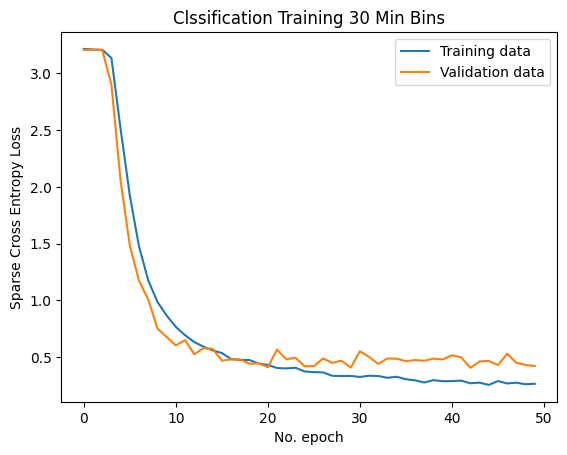

In [34]:
plt.plot(hist_clas_30.history['loss'], label='Training data')
plt.plot(hist_clas_30.history['val_loss'], label='Validation data')
plt.title('Clssification Training 30 Min Bins')
plt.ylabel('Sparse Cross Entropy Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [35]:
y_pred = [np.argmax(i) for i in y_pred_30]

print(classification_report(y_true=y_clas_30_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        46
           1       0.90      0.94      0.92        66
           2       0.90      0.88      0.89        83
           3       0.94      0.94      0.94        65
           4       0.88      0.85      0.86        67
           5       0.85      0.96      0.90        71
           6       0.91      0.83      0.87        71
           7       0.94      0.76      0.84        82
           8       0.82      0.92      0.86        73
           9       0.85      0.90      0.88        83
          10       0.96      0.89      0.92        79
          11       0.88      0.89      0.89        74
          12       0.90      0.94      0.92        93
          13       0.72      0.83      0.77        69
          14       0.94      0.81      0.87        90
          15       0.88      0.89      0.88        71
          16       0.94      0.93      0.93        83
          17       0.84    

### 20 min bins

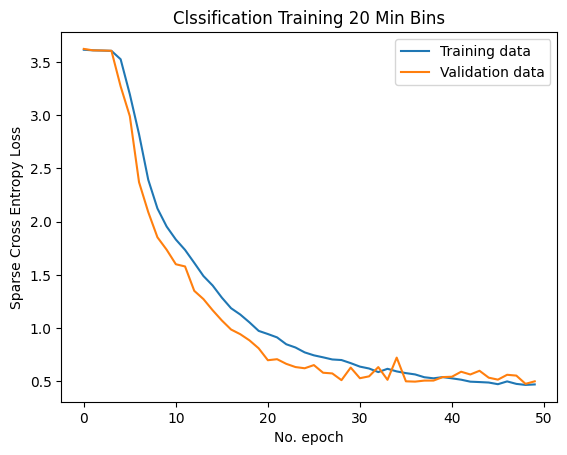

In [36]:
plt.plot(hist_clas_20.history['loss'], label='Training data')
plt.plot(hist_clas_20.history['val_loss'], label='Validation data')
plt.title('Clssification Training 20 Min Bins')
plt.ylabel('Sparse Cross Entropy Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [37]:
y_pred = [np.argmax(i) for i in y_pred_20]

print(classification_report(y_true=y_clas_20_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72        26
           1       0.94      0.86      0.90        57
           2       0.88      0.86      0.87        51
           3       0.86      0.89      0.88        55
           4       0.92      0.86      0.89        51
           5       0.84      0.88      0.86        48
           6       0.90      0.90      0.90        58
           7       0.91      0.91      0.91        56
           8       0.82      0.84      0.83        38
           9       0.90      0.94      0.92        49
          10       0.82      0.89      0.86        47
          11       0.85      0.92      0.88        48
          12       0.93      0.74      0.82        57
          13       0.82      0.85      0.83        47
          14       0.95      0.90      0.92        58
          15       0.92      0.90      0.91        40
          16       0.90      0.90      0.90        48
          17       0.80    

### 10 min bins

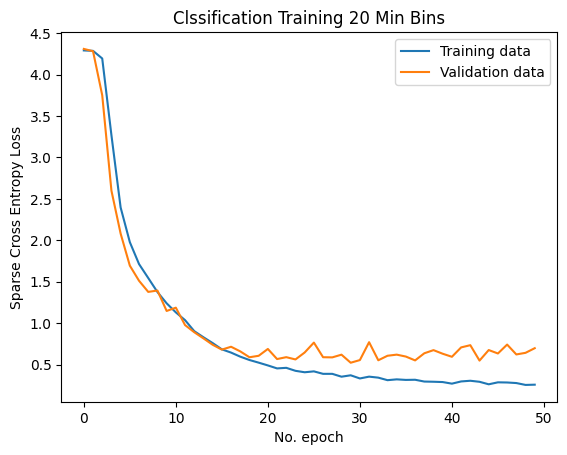

In [38]:
plt.plot(hist_clas_10.history['loss'], label='Training data')
plt.plot(hist_clas_10.history['val_loss'], label='Validation data')
plt.title('Clssification Training 20 Min Bins')
plt.ylabel('Sparse Cross Entropy Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [39]:
y_pred = [np.argmax(i) for i in y_pred_10]

print(classification_report(y_true=y_clas_10_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.81      0.81      0.81        26
           2       0.73      0.80      0.76        20
           3       0.95      0.81      0.88        26
           4       0.72      0.85      0.78        27
           5       0.89      0.70      0.78        23
           6       0.76      0.76      0.76        21
           7       0.81      0.68      0.74        25
           8       0.78      0.88      0.82        32
           9       0.88      0.72      0.79        32
          10       0.67      0.74      0.70        27
          11       0.86      0.61      0.72        31
          12       0.86      0.76      0.81        25
          13       0.75      0.95      0.84        19
          14       0.82      0.97      0.89        29
          15       0.88      0.81      0.85        27
          16       0.78      0.84      0.81        25
          17       0.85    

### 1 min bins

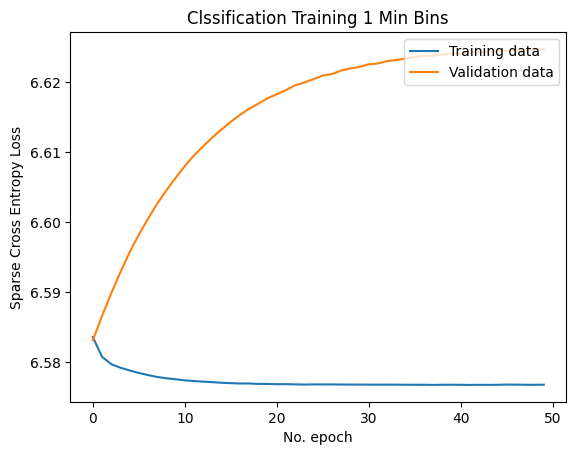

In [40]:
plt.plot(hist_clas_1.history['loss'], label='Training data')
plt.plot(hist_clas_1.history['val_loss'], label='Validation data')
plt.title('Clssification Training 1 Min Bins')
plt.ylabel('Sparse Cross Entropy Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [41]:
y_pred = [np.argmax(i) for i in y_pred_1]

print(classification_report(y_true=y_clas_1_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       3.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       4.0
           3       0.00      0.00      0.00       3.0
           4       0.00      0.00      0.00       5.0
           5       0.00      0.00      0.00       3.0
           6       0.00      0.00      0.00       2.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       4.0
          11       0.00      0.00      0.00       3.0
          12       0.00      0.00      0.00       2.0
          13       0.00      0.00      0.00       5.0
          14       0.00      0.00      0.00       5.0
          15       0.00      0.00      0.00       2.0
          16       0.00      0.00      0.00       4.0
          17       0.00      0.00      0.00       2.0
          18       0.00    

/home/jaspe/miniconda3/envs/tf_gpu/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/jaspe/miniconda3/envs/tf_gpu/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/jaspe/miniconda3/envs/tf_gpu/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz